# K-Means Clustering

In this algorithm it is intended to to have effective initialization and better distance function. In K-means, we have clusters and each cluster has its own centroid. Sum of square of distance between centroid and the data points  within a cluster constitutes within sum of square value for that cluster. Also, when the sum of square values for all the clustes is done, it becomes total within sum of square value for the cluster solution. 

As the number of cluster increases, this value keeps on decreasing but if we plot the result we may see the sum of squared distance decreases sharply upto some value of `k` and then much more slowly after that. This determines the optimum number of cluster.

**Note** It is advisable to do data preprocessing before doing Factor Analysis (FA) and Cluster Analysis of the data. The different visualization techniques can also be used for understanding the relationship between the variables in the data.

In [1]:
# Importing the necessary packages and load the dataset
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
print("Dimension of dataset is: ", X.shape)

Dimension of dataset is:  (150, 4)


In [3]:
# Elbow method to find the optimal number of clusters
list1 = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    
# inertia = WCSS (within cluster sum of squares)
    list1.append(kmeans.inertia_)

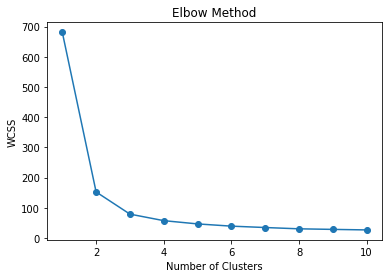

In [4]:
# Creating the scree plot
plt.plot(range(1,11), list1, marker = "o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [5]:
# Fitting K-means algorithm to dataset with optimum number of clusters
kmeans = KMeans(n_clusters = 3, random_state = 10)
y_kmeans = kmeans.fit_predict(X)
print("The predicted clusters are: \n", y_kmeans)
print("The centers are: \n", kmeans.cluster_centers_)

The predicted clusters are: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
The centers are: 
 [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [6]:
# Determining the number of observations in the cluster
data = {"Original": y, "Predicted": y_kmeans}
kmeansdf = pd.DataFrame(data, columns = ["Original", "Predicted"])
print("Details of the predicted cluster are: \n", kmeansdf["Predicted"].value_counts())

Details of the predicted cluster are: 
 1    62
0    50
2    38
Name: Predicted, dtype: int64


In [7]:
# Creating names of the clusters
kmeansdf["Original"].replace(to_replace =int("0"), value = "Setosa", inplace = True)
kmeansdf["Original"].replace(to_replace =int("1"), value = "Versicolor", inplace = True)
kmeansdf["Original"].replace(to_replace =int("2"), value = "Virginaca", inplace = True)

kmeansdf["Predicted"].replace(to_replace =int("0"), value = "Setosa", inplace = True)
kmeansdf["Predicted"].replace(to_replace =int("1"), value = "Versicolor", inplace = True)
kmeansdf["Predicted"].replace(to_replace =int("2"), value = "Virginaca", inplace = True)

In [8]:
# Creating Confusion Matrix of the model
results = confusion_matrix(kmeansdf["Original"], kmeansdf["Predicted"])
print("The confusion matrix is: \n", results)

The confusion matrix is: 
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


In [9]:
# Determining the accuracy of the model
score = accuracy_score(kmeansdf["Original"], kmeansdf["Predicted"])
print("The accuracy is: ", score.round(3))

The accuracy is:  0.893


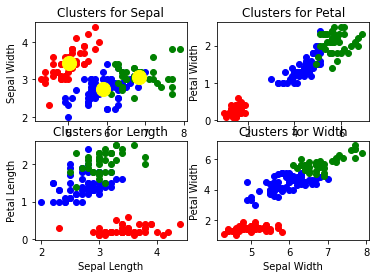

In [10]:
# Visualizing the clusters for sepal.length and sepal.width
plt.figure(2)
plt.subplot(221)
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], c = "red")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], c = "blue")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], c = "green")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = "yellow",
           label = "Centroids")
plt.title("Clusters for Sepal")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# Visualizing the clusters for petal.length and petal.width
plt.subplot(222)
plt.scatter(X[y_kmeans == 0,2], X[y_kmeans == 0,3], c = "red")
plt.scatter(X[y_kmeans == 1,2], X[y_kmeans == 1,3], c = "blue")
plt.scatter(X[y_kmeans == 2,2], X[y_kmeans == 2,3], c = "green")
plt.title("Clusters for Petal")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# Visualizing the clusters for sepal.length and petal.length
plt.subplot(223)
plt.scatter(X[y_kmeans == 0,1], X[y_kmeans == 0,3], c = "red", label = "Setosa")
plt.scatter(X[y_kmeans == 1,1], X[y_kmeans == 1,3], c = "blue", label = "Versicolor")
plt.scatter(X[y_kmeans == 2,1], X[y_kmeans == 2,3], c = "green", label = "Virginaca")
plt.title("Clusters for Length")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")

# Visualizing the clusters for sepal.width and petal.width
plt.subplot(224)
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,2], c = "red", label = "Setosa")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,2], c = "blue", label = "Versicolor")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,2], c = "green", label = "Virginaca")
plt.title("Clusters for Width")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.show()